In [1]:
import struct
import numpy as np
from matplotlib import pyplot
import matplotlib as mpl

In [2]:
"""
Modified from https://gist.github.com/akesling/5358964
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""
def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """
    with open('../data/raw/train-labels-idx1-ubyte', 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open('../data/raw/train-images-idx3-ubyte', 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)

In [3]:
def show(image):
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

def ascii_show(image):
    for y in image:
        row = ""
        for x in y:
            row += '{:02X}'.format(x)+' '
        print(row)

In [5]:
training_data = list(read(dataset='traing',path='../data/raw/'))
label, pixel = training_data[0]
print(len(training_data))
print(label)
print(pixel.shape)

60000
5
(28, 28)


## 2. Export the first image of train-images.idx3-ubyte. The size will be 28x28。

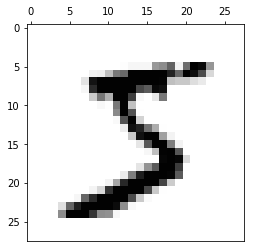

In [6]:
training_data = list(read(dataset='traing',path='../data/raw/'))
label, pixel = training_data[0]
show(pixel)

In [7]:
ascii_show(pixel)

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 03 12 12 12 7E 88 AF 1A A6 FF F7 7F 00 00 00 00 
00 00 00 00 00 00 00 00 1E 24 5E 9A AA FD FD FD FD FD E1 AC FD F2 C3 40 00 00 00 00 
00 00 00 00 00 00 00 31 EE FD FD FD FD FD FD FD FD FB 5D 52 52 38 27 00 00 00 00 00 
00 00 00 00 00 00 00 12 DB FD FD FD FD FD C6 B6 F7 F1 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 50 9C 6B FD FD CD 0B 00 2B 9A 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 0E 01 9A FD 5A 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 8B FD BE 02 00 00 00 00 00 00 00

## 3.  Export the average value of first ten images in train-images.idx3-ubyte. The size will be 28x28。

In [8]:
pixels = np.zeros([28,28])
for i in range(10):
    label, pixel = training_data[i]
    pixels += pixel
pixels = pixels/10

In [9]:
ascii_show(pixels.astype(np.uint8))

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 0E 19 15 08 0F 19 0F 05 00 00 12 13 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 07 1C 2B 4D 3B 41 4A 5C 4D 42 45 35 1C 00 00 00 00 
00 00 00 00 06 08 00 00 03 07 17 26 3B 6D 88 6A 64 6D 78 6B 6B 59 31 0F 00 00 00 00 
00 00 00 00 0C 10 00 04 17 2B 32 37 5D A2 AC 8A 7B 73 65 79 80 5F 20 00 00 00 00 00 
00 00 00 00 16 10 00 01 15 25 41 65 95 B7 A1 6D 5E 78 6E 7F 7D 50 0A 00 00 00 00 00 
00 00 00 00 16 10 00 00 08 1A 31 68 95 A6 68 26 38 56 66 84 77 36 00 00 00 00 00 00 
00 00 00 04 18 10 00 00 00 21 4A 5B 7D 78 3D 3B 39 44 62 74 6D 35 05 00 00 00 00 00 
00 00 00 0C 19 10 00 00 11 2C 3F 46 4C 61 36 40 42 4E 65 6A 65 1E

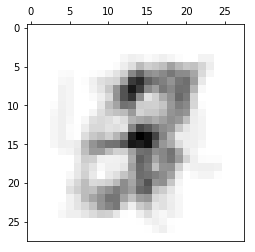

In [10]:
show(pixels)

## 4. Export the average of first ten labels in train-labels.idx1-ubyte.

In [ ]:
labels = []
for i in range(10):
    label, pixel = training_data[i]
    labels.append(label)
print(labels, 'Mean:{:.2f}'.format(np.mean(labels)))

## 5. Export the first image in train-images.idx3-ubyte. The size will be 32x32. Add zero padding.

In [12]:
def padding(img):
    result = np.zeros([32,32])
    for i in range(28):
        for j in range(28):
            result[i+2,j+2] = img[i,j]
    return result

In [14]:
label, pixel = training_data[0]
img = padding(pixel)
ascii_show(img.astype(np.uint8))

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 03 12 12 12 7E 88 AF 1A A6 FF F7 7F 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 1E 24 5E 9A AA FD FD FD FD FD E1 AC FD F2 C3 40 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 31 EE FD FD FD FD FD FD FD FD FB 5D 52 52 38 27 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 12 

## 6. Save the image in the problem 2 as BMP file. (Skip)